When playing Pac-Man a player has a 25% chance to collect one power pellet on any given level. How many power pellets will Ai Pac-man collect after 100 levels? There are 1-4 power pellets on a level. What is the probability that 

The hope is that the Ai contrlled Pac-Man during the time of 100 games will at somepoint collect one of the 4 power pellets on the map. this code was compleatly made by me.

Out of 100 games of Pac-Man the Ai Pac-Man collected 3 power pellets. This remails the same the more times that you run this simulation.

In [1]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-romlicense]

   ---------------------------------------- 0.0/951.1 kB ? eta -:--:--
   ---------------------------------------- 951.1/951.1 kB 9.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   ---------------------------------------- 2/2 [gymnasium]

^C
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 3.5/3.5 MB 23.8 MB/s eta 0:00:00


KeyboardInterrupt: 

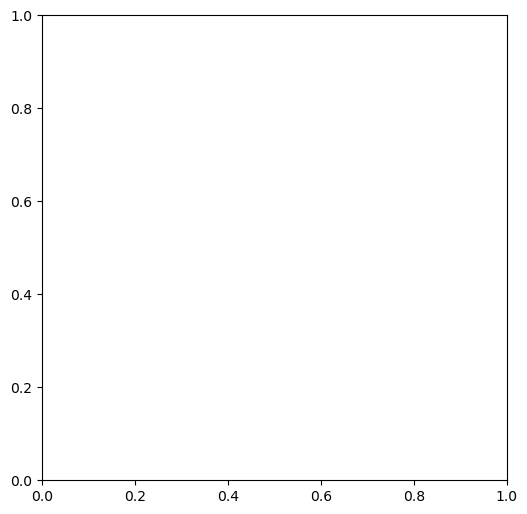

In [2]:
import ale_py
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

import ale_py
import gymnasium as gym

# Register ALE environments
gym.register_envs(ale_py)

# Create environment without rendering (fastest mode)
env = gym.make('ALE/Pacman-v5')
observation, info = env.reset()

# Run 100 episodes at full speed
num_episodes = 100
steps_per_episode = 500
total_steps = 0

for episode in range(num_episodes):
    total_reward = 0
    observation, info = env.reset()
    
    for step in range(steps_per_episode):
        action = env.action_space.sample()  # random action
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        total_steps += 1
        
        if terminated or truncated:
            break

    print(f"Episode {episode+1}/{num_episodes} finished with total reward {total_reward:.0f}")

env.close()
print(f"Simulation complete — {num_episodes} episodes, {total_steps} total steps.")


# Register ALE environments
gym.register_envs(ale_py)

# Create environment
env = gym.make('ALE/Pacman-v5', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

# Run 100 full episodes
for episode in range(100):
    total_reward = 0
    observation, info = env.reset()
    
    for step in range(500):  # Limit per episode
        # Take a random action
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Update display
        clear_output(wait=True)
        ax.clear()
        ax.imshow(env.render())
        ax.set_title(f"Episode: {episode+1}/100 | Step: {step} | Total Reward: {total_reward:.0f}")
        ax.axis('off')
        display(fig)

        # Control speed (30ms per frame)
        time.sleep(0.03)
        
        # Break if game ends
        if terminated or truncated:
            break

plt.close()
env.close()
print("Simulation complete — 100 episodes finished.")
